In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Utils and data generation

In [67]:
B = 200
N = 20

X = np.random.randn(N)
print('sample mean of X:', X.mean())

sample mean of X: -0.1838018367751689


In [68]:
def bootstrap_estimate(x, repetitions_numer, estimator, resample_size=None):
  B = repetitions_numer
  N = resample_size if resample_size is not None else len(x)

  bootstrap_sampling_estimates = np.empty(B)
  for b in range(B):
    xb = np.random.choice(x, size=N)
    bootstrap_sampling_estimates[b] = estimator(xb)
  
  return bootstrap_sampling_estimates

def calc_empirical_quartiles(x, p):
  n = len(x)
  x_sorted = np.sort(x)
  lower = x_sorted[int(n*p)]
  upper = x_sorted[int(n*(1-p)) + 1]
  return lower, upper


# Colculations

In [69]:
resample_estimates = bootstrap_estimate(X, B, np.mean)

95.0
bootstrap stats of X: mu=-0.19670254514190433, std=0.1606588324843254


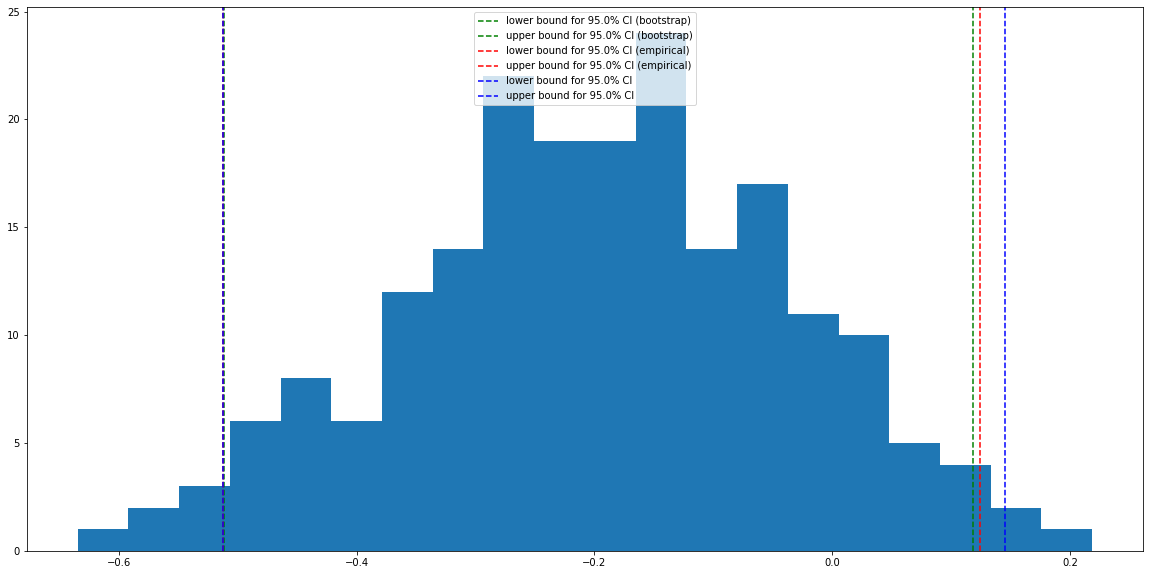

In [75]:
p_value = 0.025
N01_lower = norm.ppf(p_value) # norm.ppf(0.025) == -1.96
N01_upper = norm.ppf(1-p_value) # norm.ppf(0.025) == -1.96

print((1-2*p_value)*100)

mu_hat = resample_estimates.mean()
std_hat = resample_estimates.std()
lower_bootstrap = mu_hat + N01_lower*std_hat 
upper_bootstrap = mu_hat + N01_upper*std_hat

# traditional way of calculating CI
lower_standard = X.mean() + N01_lower*X.std()/np.sqrt(N)
upper_standard = X.mean() + N01_upper*X.std()/np.sqrt(N)

lower_empirical, upper_empirical = calc_empirical_quartiles(resample_estimates, p_value)

print(f'bootstrap stats of X: mu={mu_hat}, std={std_hat}')

CI_size = (1-2*p_value)*100
plt.figure(figsize=(20,10))
plt.hist(resample_estimates, bins=20)
plt.axvline(x=lower_bootstrap, linestyle='--', color='g', label=f'lower bound for {CI_size}% CI (bootstrap)')
plt.axvline(x=upper_bootstrap, linestyle='--', color='g', label=f'upper bound for {CI_size}% CI (bootstrap)')
plt.axvline(x=lower_empirical, linestyle='--', color='r', label=f'lower bound for {CI_size}% CI (empirical)')
plt.axvline(x=upper_empirical, linestyle='--', color='r', label=f'upper bound for {CI_size}% CI (empirical)')
plt.axvline(x=lower_standard, linestyle='--', color='b', label=f'lower bound for {CI_size}% CI')
plt.axvline(x=upper_standard, linestyle='--', color='b', label=f'upper bound for {CI_size}% CI')
plt.legend()
plt.show();